In [1]:
import numpy as np
import matplotlib.pyplot as plt
from interface import compute_joint_smc, merge_pop, compute_TV

## Structed smc


In [7]:
dim = 2000
dt = 100
dens_dx = merge_pop(0.001, 2000, 100)

In [3]:
rho_values = np.array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30], float)
joint_smc = compute_joint_smc(dens_dx, rho_values)

100%|███████████████████████████████████████████████| 9/9 [04:42<00:00, 31.37s/it]


In [4]:
joint_smc_times = joint_smc[:, :dim, :dim]  \
                + joint_smc[:, dim:, dim:] \
                + joint_smc[:, dim:, :dim] \
                + joint_smc[:, :dim, dim:]

In [5]:
np.save(f'eq_mig=0.1_{dim}_{dt}_smc', joint_smc_times)

In [9]:
dens_dx_quad = merge_pop(0.001, 2000, 100)
dens_dx_quad = dens_dx_quad[:dim, :dim]  \
             + dens_dx_quad[dim:, dim:] \
             + dens_dx_quad[dim:, :dim] \
             + dens_dx_quad[:dim, dim:]
dens_dx = np.load(f'eq_mig=0.1_pop_a=-1_pop_b=-1_rho_m=0.001_{dim}_{dt}.npy')

## SMC

In [3]:
dim = 2000
dt = 100
dens_dx = np.load(f'eq_mig=0.1_pop_a=-1_pop_b=-1_rho_m=0.001_{dim}_{dt}.npy')

In [5]:
rho_values = np.array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30], float)
joint_smc = compute_joint_smc(dens_dx, rho_values)
np.save(f'eq_mig=0.1_{dim}_{dt}_simple_smc', joint_smc)

100%|███████████████████████████████████████████████| 9/9 [00:24<00:00,  2.71s/it]


## TV

In [3]:
simple_smc = np.load(f'eq_mig=0.1_{dim}_{dt}_simple_smc.npy')
struct_smc = np.load(f'eq_mig=0.1_{dim}_{dt}_smc.npy')
coal_rec = np.load(f'eq_mig=0.1_{dim}_{dt}.npy')

In [7]:
TV_simple_tail = compute_TV(coal_rec, simple_smc)
TV_struct_tail = compute_TV(coal_rec, struct_smc)

In [4]:
TV_betw = compute_TV(simple_smc, struct_smc)

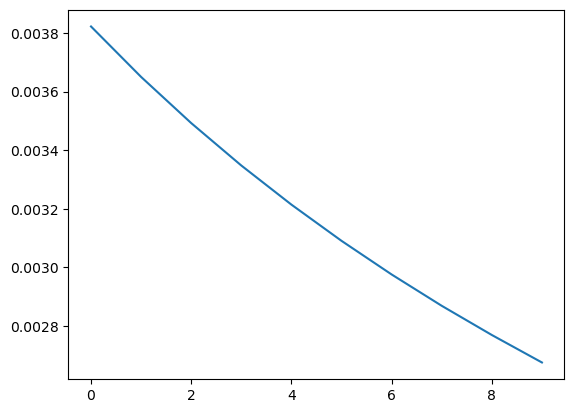

In [5]:
plt.plot(TV_betw)

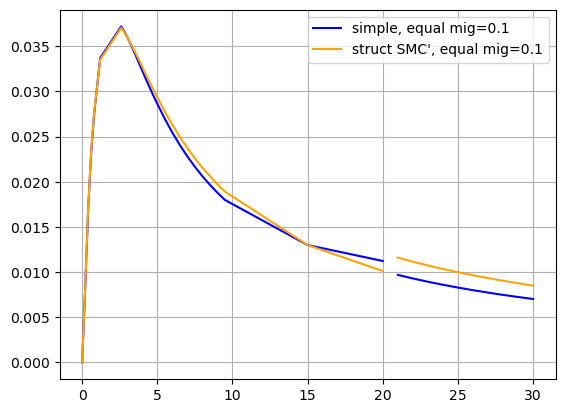

In [9]:
rho_vals = np.array([0.2, 0.4, 0.6, 0.8, 1.2, 2.6, 2.8, 3.2, 3.4, 
                     3.6, 3.8, 4.0, 4.2, 4.4, 4.6, 4.8, 5.5, 6., 6.5, 7., 
                     7.5, 8., 8.5, 9., 9.5, 15., 20.], float)
TV_simple = np.load('equal_mig_0.1_2000_100_tv.npy')
TV = np.load('eq_mig=0.1_2000_100_TV.npy')
plt.plot(np.append([0.001], rho_vals), TV_simple, 'b', label='simple, equal mig=0.1')
rho_values = np.array([0.001, 0.2, 0.4, 0.6, 0.8, 1.2, 2.6, 2.8, 3.2, 3.4,
                     3.6, 3.8, 4.0, 4.2, 4.4, 4.6, 4.8, 5.5, 6., 6.5, 7.,
                     7.5, 8., 9., 9.5, 15., 20.], float)
plt.plot(rho_values, TV, 'orange', label='struct SMC\', equal mig=0.1')

rho_tail = [21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
plt.plot(rho_tail, TV_simple_tail, 'b')
plt.plot(rho_tail, TV_struct_tail, 'orange')

plt.grid()
plt.legend()